# Types of Learning and Simple Classifiers
---

## Summary

***Supervised learning***

> The main goal in ***supervised learning*** is to learn a model from labeled training data that allows us to make predictions about unseen or future data. Here, the term “supervised” refers to a set of training examples (data inputs) where the desired output signals (labels) are already known.

> ***Classification*** is a subcategory of ***supervised learning*** where the goal is to predict the categorical class labels of new instances or data points based on past observations.

> A second type of ***supervised learning*** is the prediction of continuous outcomes, which is also called ***regression analysis***.

***Reinforcement learning***

> In ***reinforcement learning***, the goal is to develop a system (agent) that improves its performance based on interactions with the environment. (...) In sum, reinforcement learning is concerned with learning to choose a series of actions that maximizes the total reward, which could be earned either immediately after taking an action or via delayed feedback.

***Unsupervised learning***

> Using ***unsupervised learning*** techniques, we are able to explore the structure of our data to extract meaningful information without the guidance of a known outcome variable or reward function.

> ***Clustering*** is an exploratory data analysis or pattern discovery technique that allows us to organize a pile of information into meaningful subgroups (clusters) without having any prior knowledge of their group memberships.

***

> As a convention, we append an underscore \_ to attributes that are not created upon the initialization of the object, but we do this by calling the object’s other methods, for example, self.w_.

> It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable, which means that the two classes can be perfectly separated by a linear decision boundary. If the two classes can’t be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset (epochs) and/or a threshold for the number of tolerated misclassifications - the perceptron would never stop updating the weights otherwise.

> Technically, we could initialize the weights to zero (in fact, this is done in the original perceptron algorithm). However, if we did that, then the learning rate $\eta$ (eta) would have no effect on the decision boundary. If all the weights are initialized to zero, the learning rate parameter, eta, affects only the scale of the weight vector, not the direction.

> ***One-versus-All for multi-class classification***: OvA, which is sometimes also called one-versus-rest (OvR), is a technique that allows us to extend any binary classifier to multi-class problems. Using OvA, we can train one classifier per class, where the particular class is treated as the positive class and the examples from all other classes are considered negative classes.

> The key difference between the Adaline rule (also known as the Widrow-Hoff rule) and Rosenblatt’s perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron.

- The advantage is that we are computing errors in a continuous function that can provide way more information about the predicted value and the network weights. For instance, if our true label is 1 and the output of our activation function (a sigmoid) is 0.7 probability to belong to class 1, we can use this -0.3 error to update the weights. In the perceptron setting there would be no error to learn from, since 1 - 1 = 0.
- ![](assets/2023-06-02-16-59-52.png)

> Mean Squared Error (MSE): $$L(\bold{w}, b) = \frac{1}{2n} \sum_{i = 1}^n (y^{(i)} - \sigma(z^{(i)}))^2$$

> ***Gradient descent is one of the many algorithms that benefit from feature scaling***. We used a feature scaling method called standardization ($x_j = \frac{x_j - \mu_j}{\sigma_j}$).
>
> One of the reasons why standardization helps with gradient descent learning is that it is easier to find a learning rate that works well for all weights (and the bias). If the features are on vastly different scales, a learning rate that works well for updating one weight might be too large or too small to update the other weight equally well.

***

- A função do *bias* é muito bem resumida [aqui](https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import zscore
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The goal of what is implemented here is to classify correctly the below elements.

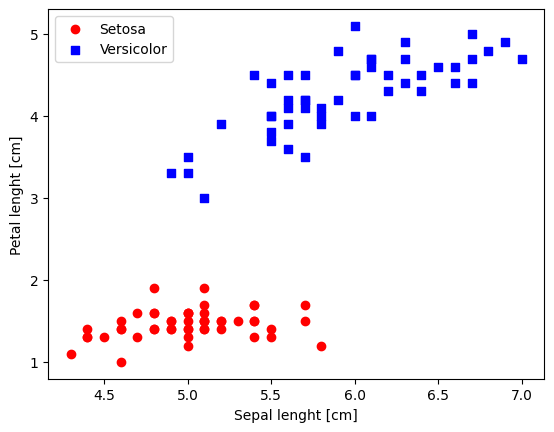

In [5]:
X = iris.data[0:100, [0, 2]]
y = np.where(iris.target[:100] == 0, 0, 1)

setosa_slenght = X[:50, 0]
setosa_plenght = X[:50, 1]

versicolor_slenght = X[50:100, 0]
versicolor_plenght = X[50:100, 1]

plt.scatter(setosa_slenght, setosa_plenght, color="r", marker="o", label="Setosa")
plt.scatter(
    versicolor_slenght, versicolor_plenght, color="b", marker="s", label="Versicolor"
)
plt.xlabel("Sepal lenght [cm]")
plt.ylabel("Petal lenght [cm]")
plt.legend(loc="upper left")

plt.show()

In [24]:
def plot_decision_regions(X, y, classifier, ax, resolution=0.02):

    markers = ("o", "s", "^", "v", "<")
    colors = ("r", "b", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # Plots
    ax.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # Class Examples

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')


## Perceptron 

For the following code, I included print statements to visualize how the weights and biases behave through the *epochs*.
***

In [26]:
class Perceptron:
    """Perceptron classifier."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def net_input(self, X):
        """Calculate net input."""
        net_input = np.dot(X, self.w_) + self.b_

        # print(f"\t input * weight + bias = net_input -> {X} * {self.w_} + {self.b_} = {net_input}")

        return net_input

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)

        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.0)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0

            # print(f"\n### Epoch {_}\n")

            for xi, target in zip(X, y):
                # print(f"\n### Weight and bias updated for observation {xi}")

                update = self.eta * (target - self.predict(xi))

                self.w_ = self.w_ + update * xi
                self.b_ = self.b_ + update

                # print(f"\t true class: {target}")
                # print(f"\t update: {update}")
                # print(f"\t new weight {self.w_}")
                # print(f"\t new bias {self.b_}")

                errors = errors + int(update != 0.0)

            self.errors_.append(errors)

        return self

    def predict(self, X):
        """Return class label after unit step."""
        predict = np.where(self.net_input(X) >= 0.0, 1, 0)

        # print(f"\t predicted class: {predict}")

        return predict


ppn = Perceptron(eta=0.1, n_iter=10).fit(X, y)

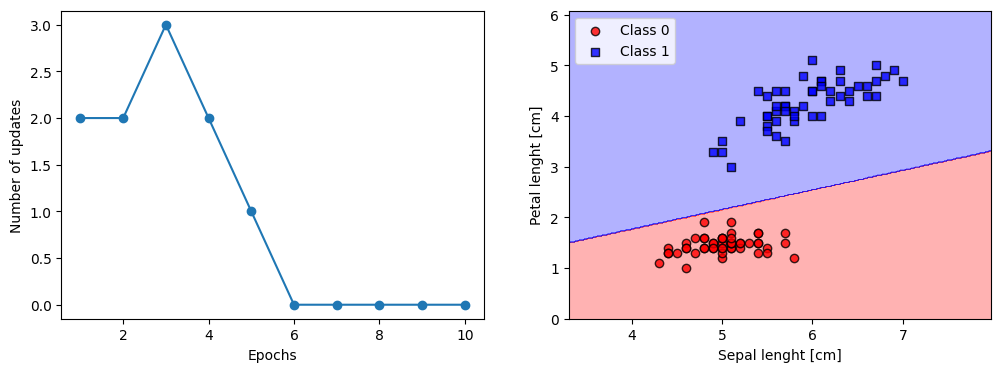

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Number of updates")

plot_decision_regions(X, y, classifier=ppn, ax=axes[1])
axes[1].set_xlabel("Sepal lenght [cm]")
axes[1].set_ylabel("Petal lenght [cm]")
axes[1].legend(loc="upper left")

plt.show()

## Adaline (Adaptive Linear Neuron) 

***

In [16]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1) -> None:
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)

        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.0)
        self.losses_ = []

        for i in range(self.n_iter):
            # print(f"\n### Epoch {i}\n")

            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output

            # print(f"\t errors: {errors.shape}")

            self.w_ += self.eta * 2.0 * np.dot(X.T, errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()

            # print(f"\t new weight {self.w_}")
            # print(f"\t new bias {self.b_}")

            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self

    def net_input(self, X):
        net_input = np.dot(X, self.w_) + self.b_

        # print(f"\t input * weight + bias = net_input -> {X.shape} * {self.w_.shape} + {self.b_.shape} = {net_input.shape}")

        return net_input

    def activation(self, X):
        return X

    def predict(self, X):
        predction = np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        return predction


ada1 = AdalineGD(eta=0.1, n_iter=15).fit(X, y)
ada2 = AdalineGD(eta=0.0001, n_iter=15).fit(X, y)

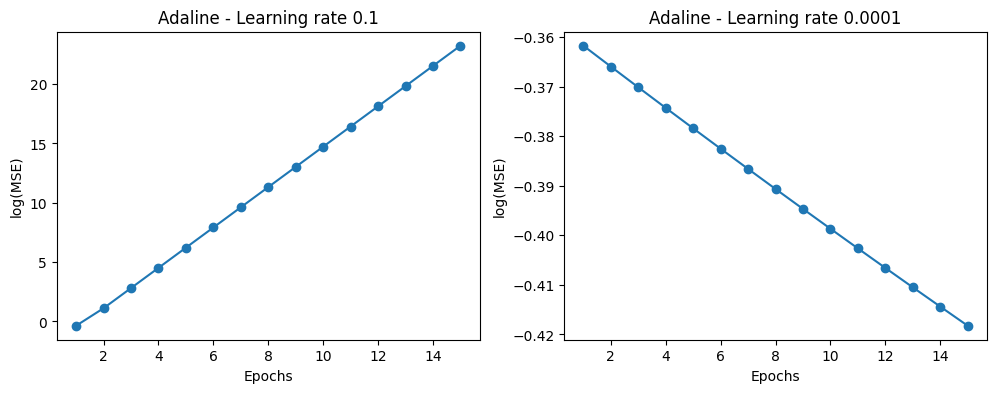

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker="o")
axes[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker="o")

for ax in axes:
    ax.set_xlabel("Epochs")
    ax.set_ylabel("log(MSE)")

axes[0].set_title("Adaline - Learning rate 0.1")
axes[1].set_title("Adaline - Learning rate 0.0001")

plt.show()

This plot shows the importance of picking an adequate learning rate.

### Feature Scaling in Adaline

In [29]:
Xsd = zscore(np.copy(X))

ada3 = AdalineGD(eta=0.5, n_iter=20).fit(Xsd, y)

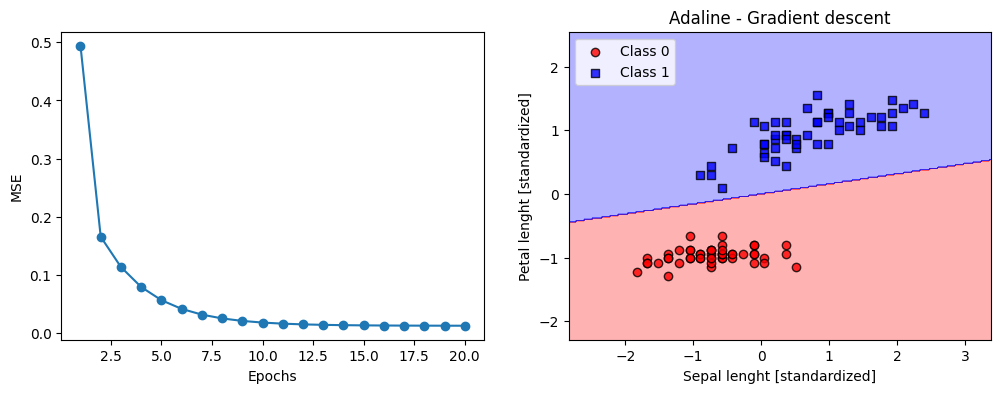

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(range(1, len(ada3.losses_) + 1), ada3.losses_, marker="o")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MSE")

plot_decision_regions(Xsd, y, classifier=ada3, ax=axes[1])
axes[1].set_title("Adaline - Gradient descent")
axes[1].set_xlabel("Sepal lenght [standardized]")
axes[1].set_ylabel("Petal lenght [standardized]")
axes[1].legend(loc="upper left")

plt.show()

## Adaline with Stochastic Gradient Descent
***

In [35]:
class AdalineSGD:

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None) -> None:
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        

    def fit(self, X, y):
        self.initialize_weights(X.shape[1])

        self.losses_ = []
        for i in range(self.n_iter):
            
            if self.shuffle:
                X, y = self.shuffle_samples(X, y)
            
            losses = []

            for xi, target in zip(X, y):
                losses.append(self.update_weights(xi, target))

            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        
        return self

    def initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
    
    def shuffle_samples(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)

        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error

        loss = error ** 2

        return loss

    def activation(self, X):
        return X

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

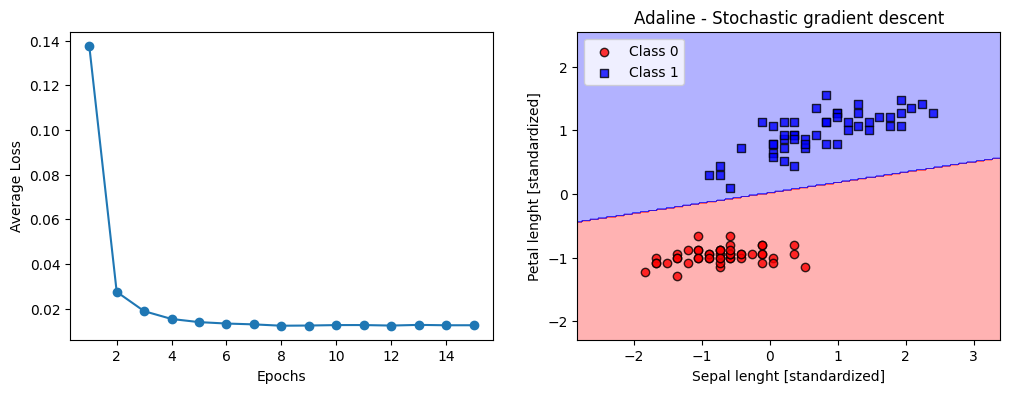

In [38]:
ada4 = AdalineSGD(eta=0.01, n_iter=15).fit(Xsd, y)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(range(1, len(ada4.losses_) + 1), ada4.losses_, marker="o")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Average Loss")

plot_decision_regions(Xsd, y, classifier=ada4, ax=axes[1])
axes[1].set_title("Adaline - Stochastic gradient descent")
axes[1].set_xlabel("Sepal lenght [standardized]")
axes[1].set_ylabel("Petal lenght [standardized]")
axes[1].legend(loc="upper left")

plt.show()